### Goal: 
Understand some of the subtraction issues cited inside if __Vasic 2018__ . Namely for subtraction, it was cited issues where
* Solution converges sufficiently quick except when *A* = *B* 
* When |A-B| <= 1 then computation error was __higher__ likelihood


Model the Mass Action Kinetics (Actual CRN provided inside of paper):
1. A $\rightarrow$ A + C 
    * `k1 * [A]`
2. B $\rightarrow$ B + H
    * `k2 * [B]`
3. c $\rightarrow$ $\emptyset$
    * `k3 * [C]`
4. c + H $\rightarrow$ $\emptyset$
    * `k4 * [C] * [H]`


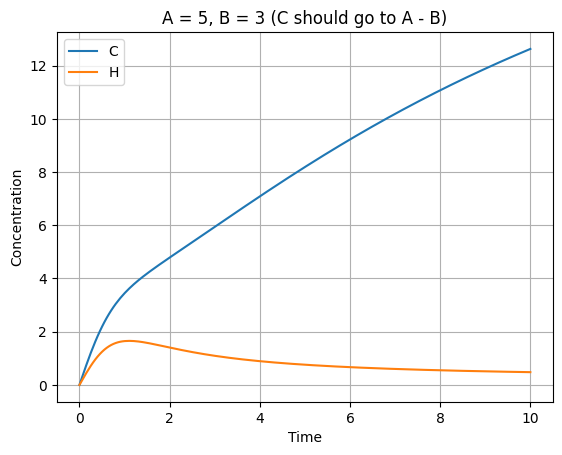

Final C ≈ 12.63


In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ODE system
def crn_ode(y, t, a, b, k1, k2, k3, k4):
    c, h = y
    dc_dt = k1 * a - k3 * c - k4 * c * h
    dh_dt = k2 * b - k4 * c * h
    return [dc_dt, dh_dt]

# Parameters
a = 5   # "Amount" of A
b = 3   # "Amount" of B
k1 = 1.0
k2 = 1.0
k3 = 0.1
k4 = 0.5

# Initial conditions
c0 = 0
h0 = 0
y0 = [c0, h0]

# Time vector
t = np.linspace(0, 10, 200)

# Solve ODE
solution = odeint(crn_ode, y0, t, args=(a, b, k1, k2, k3, k4))
c_vals, h_vals = solution.T

# Plot
plt.plot(t, c_vals, label='C')
plt.plot(t, h_vals, label='H')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title(f'A = {a}, B = {b} (C should go to A - B)')
plt.grid(True)
plt.show()

# Final concentration of C
print(f"Final C ≈ {c_vals[-1]:.2f}")
